# Lending Club

LendingClub es una compañía estadounidense de préstamos entre pares, con sede en San Francisco, California. Fue el primer prestamista peer-to-peer en registrar sus ofertas como valores ante la Comisión de Bolsa y Valores (SEC) y en ofrecer negociación de préstamos en un mercado secundario.Desde 2007, más de 4 millones de miembros se han unido al Club para ayudarlos a alcanzar sus metas financieras. Como el único banco del mercado fintech de espectro completo a escala, nuestros miembros pueden obtener acceso a una amplia gama de productos y servicios financieros a través de una plataforma impulsada por la tecnología, diseñada para ayudarlos a pagar menos cuando piden prestado y ganan más cuando ahorran.

https://www.lendingclub.com/company/about-us

## Dependencias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings

from datetime import datetime

pd.set_option('display.max_columns', None)
sns.set_palette('colorblind')
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

## Lectura de datos

Los datos fueron tomados de: https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014

In [2]:
datos=df=pd.read_csv('~/loan_data_2007_2014.csv',index_col=0)

In [3]:
df=datos.copy()
df.drop_duplicates(inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 74)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Definir la variable objetivo

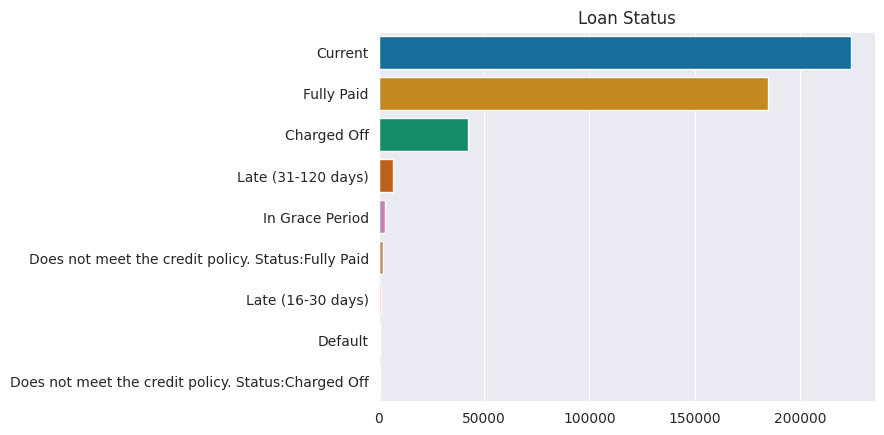

In [6]:
sns.barplot(y=df['loan_status'].value_counts().index,x=df['loan_status'].value_counts().values).set_title('Loan Status')
plt.show()

In [7]:
buenos=['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid','Late (16-30 days)']
malos= ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

In [8]:
df['target']=(df['loan_status'].isin(malos)).astype(int) # 1 si es malo, 0 si es bueno

In [9]:
df.target.value_counts(1)*100 # el 10.93% de los préstamos son malos

0    89.069346
1    10.930654
Name: target, dtype: float64

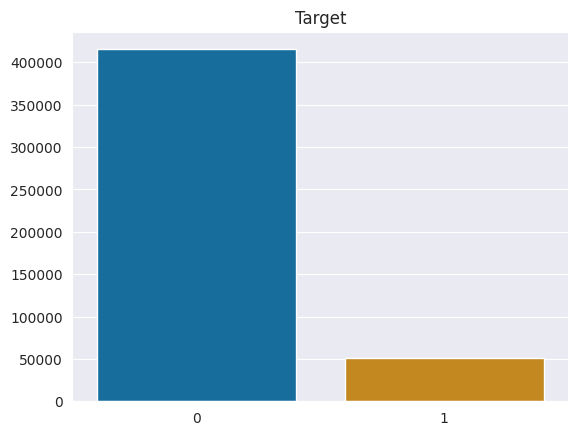

In [10]:
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts().values).set_title('Target')
plt.show()

## Limpieza previa de datos

### Valores nulos

In [11]:
columnas_nulos=[*filter(lambda x: df[x].isnull().mean()==1,df.columns)]
columnas_nulos # columnas con el  100% de nulos

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [12]:
len(columnas_nulos)

17

### Variables que no son conocidas al momento de decidir otorgar el préstamo

In [13]:
desconocidas=['loan_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
              'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
              'last_pymnt_d','last_pymnt_amnt']
len(desconocidas)

12

### Variables unarias

In [14]:
columnas_unarias=[*filter(lambda x: df[x].nunique()==1,df.columns[~df.columns.isin(columnas_nulos)])]
columnas_unarias # Columnas con un único valor

['policy_code', 'application_type']

In [15]:
len(columnas_unarias)

2

### Variables sin importancia para el modelo

In [16]:
inutiles=['member_id','url','title','zip_code',
          'next_pymnt_d','desc','emp_title']
len(inutiles)

7

### Eliminar columnnas llenas de nulos, columnas  que no son conocidas al momento de otorgar el prestamo ,columnas con un solo valor y columnas sin importancia para el modelo

In [17]:
df.drop(columns=columnas_nulos+desconocidas+columnas_unarias+inutiles,inplace=True)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN,0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0


In [18]:
df.shape

(466285, 37)

### Modificación de variables

In [19]:
df['term']=df['term'].map(lambda x: x.replace(' months','')).astype(int)
df['home_ownership']=df['home_ownership'].replace({'ANY':'OTHER','NONE':'OTHER'})
df['issue_d']=df['issue_d'].map(lambda x:x if x is np.NaN else datetime.strptime(x,'%b-%y'))
df['earliest_cr_line']=df['earliest_cr_line'].map(lambda x:x if x is np.NaN else datetime.strptime(x,'%b-%y') )
df['last_credit_pull_d']=df['last_credit_pull_d'].map(lambda x:x if x is np.NaN else datetime.strptime(x,'%b-%y') )

In [20]:
df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe()
#la variable earliest_cr_line fechas en el futuro

,issue_d,earliest_cr_line,last_credit_pull_d
count,466285,466256,466243
unique,91,664,103
top,2014-10-01 00:00:00,2000-10-01 00:00:00,2016-01-01 00:00:00
freq,38782,3674,327699
first,2007-06-01 00:00:00,1969-01-01 00:00:00,2007-05-01 00:00:00
last,2014-12-01 00:00:00,2068-12-01 00:00:00,2016-01-01 00:00:00


In [21]:
df['earliest_cr_line'][df['earliest_cr_line']>df['issue_d']]-=np.timedelta64(100,'Y')

In [22]:
df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe()
# validación de las fechas

,issue_d,earliest_cr_line,last_credit_pull_d
count,466285,466256,466243
unique,91,664,103
top,2014-10-01 00:00:00,2000-10-01 00:00:00,2016-01-01 00:00:00
freq,38782,3674,327699
first,2007-06-01 00:00:00,1944-01-01 18:00:00,2007-05-01 00:00:00
last,2014-12-01 00:00:00,2011-11-01 00:00:00,2016-01-01 00:00:00


In [23]:
df['mths_between_issued_earliest_cr']=(df['issue_d']-df['earliest_cr_line'])/np.timedelta64(30,'D')
df['mths_between_issued_earliest_cr']=np.floor(df['mths_between_issued_earliest_cr'])
# meses entre la fecha de emisión del préstamo y la fecha de apertura de la cuenta de crédito más antigua

In [24]:
df.drop(['issue_d','earliest_cr_line','last_credit_pull_d'],axis=1,inplace=True)
#borramos las columnas de fechas

In [25]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_between_issued_earliest_cr
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,327.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,NaN,0.0,NaN,NaN,NaN,1,154.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,122.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,192.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,193.0


In [26]:
df.shape

(466285, 35)

In [27]:
df.to_csv('~/data_clean.csv',index=False)